In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from env import *
from wrangle import *

### Wrangle Data

In [ ]:
df = wrangle_zillow()

### Split Data

In [3]:
train, val, test = split_data(df)

### Plot Variable Pairs + Regression Line

### Plot Variable Pairs + Regression Line

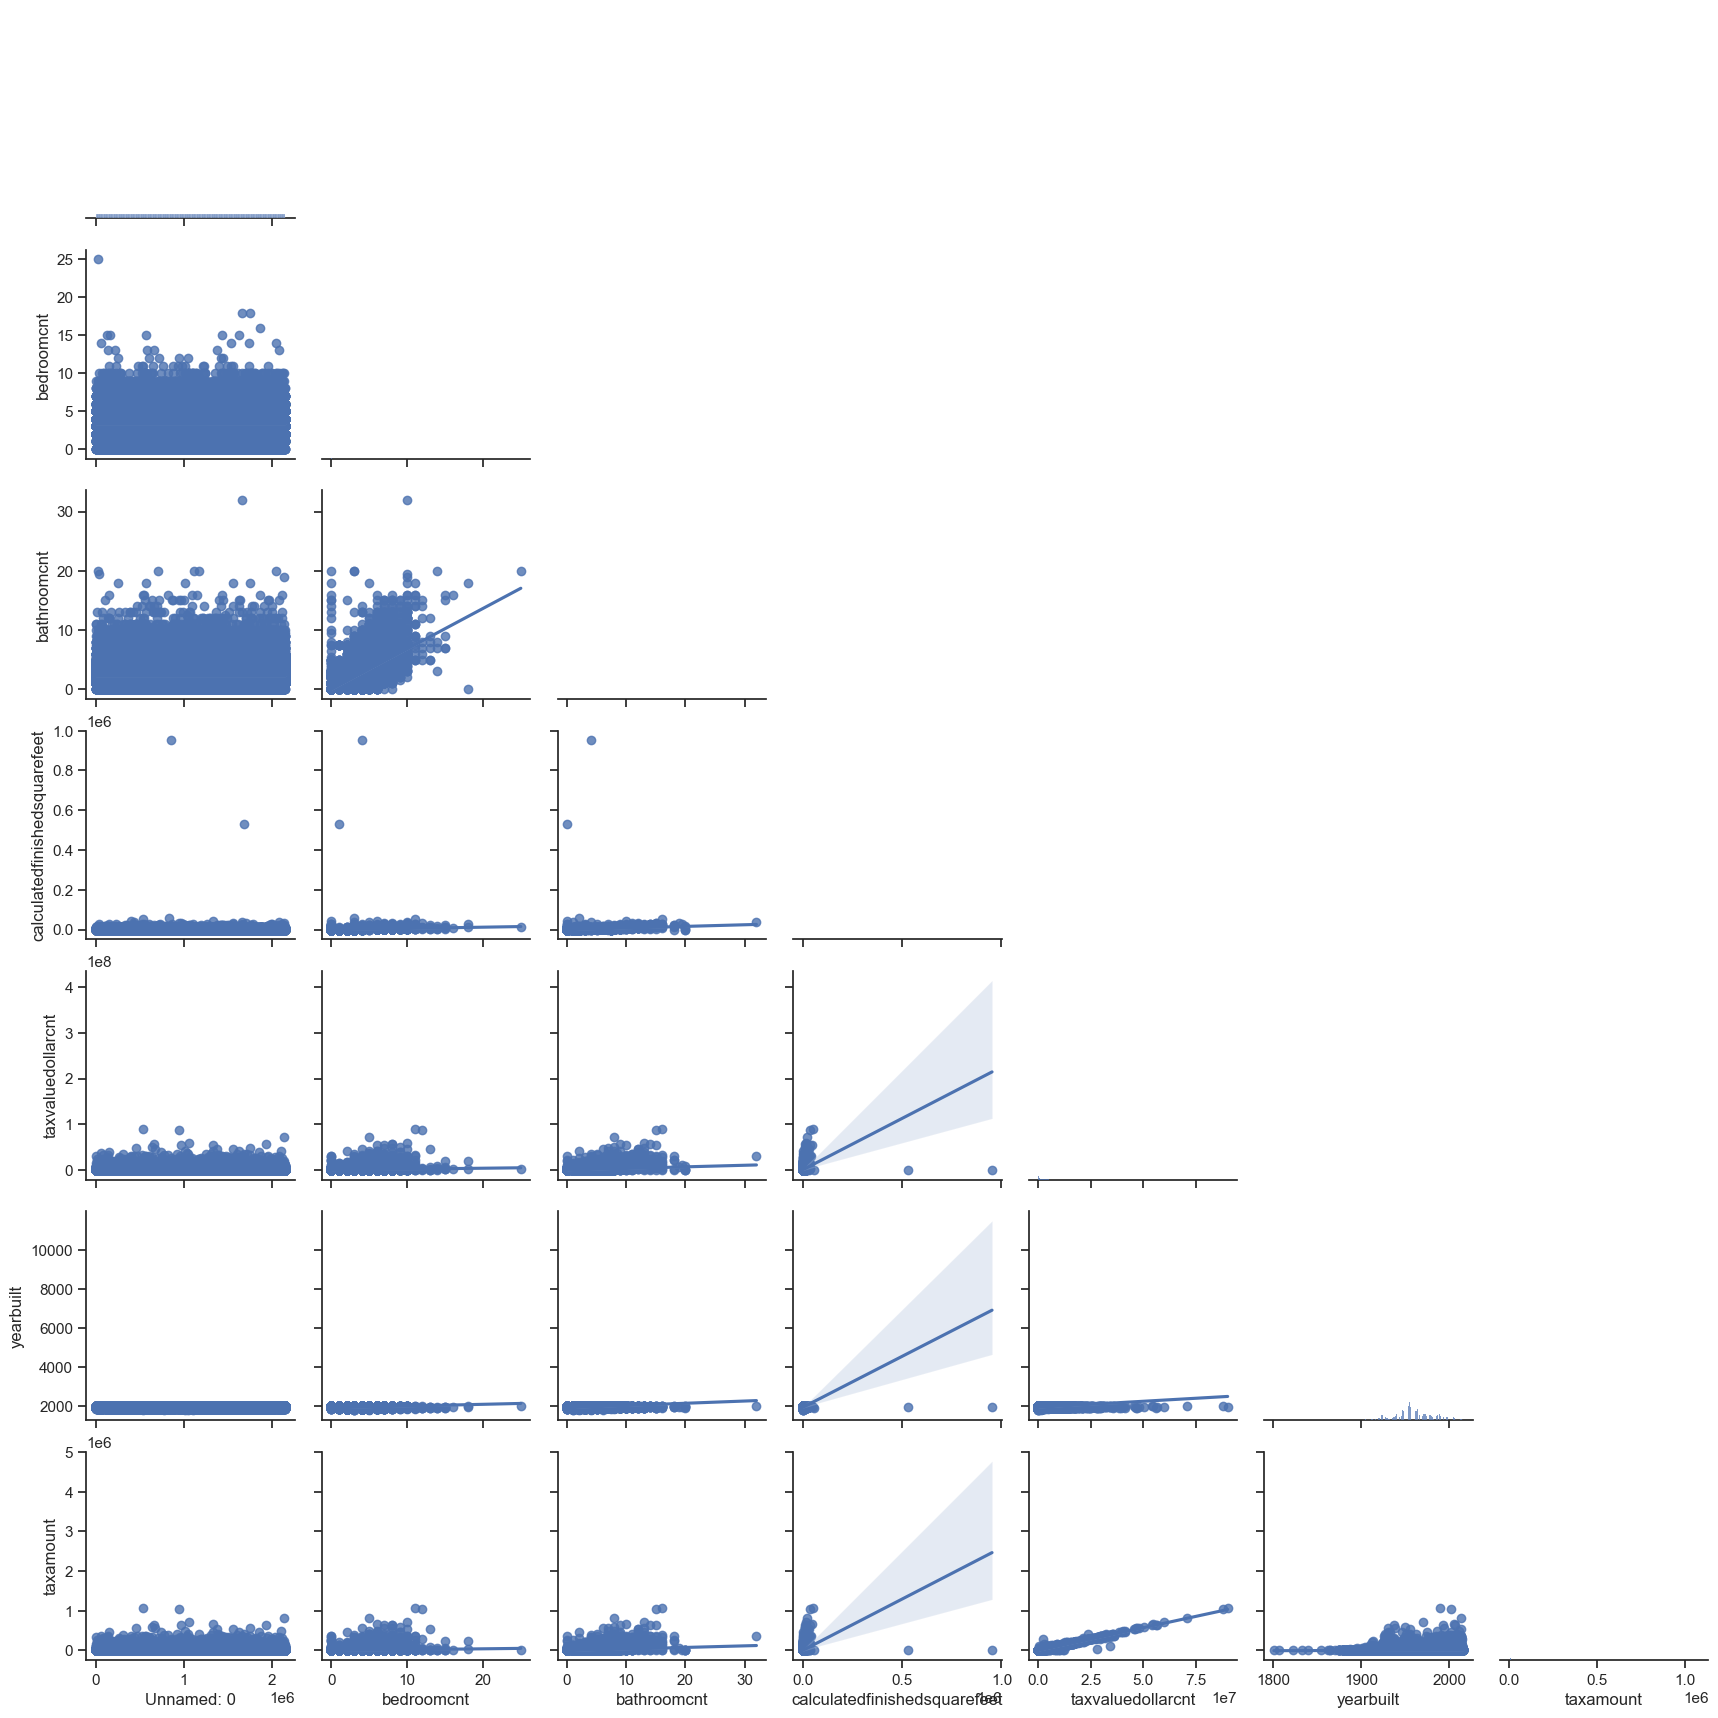

In [11]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(train, kind="reg", corner=True)

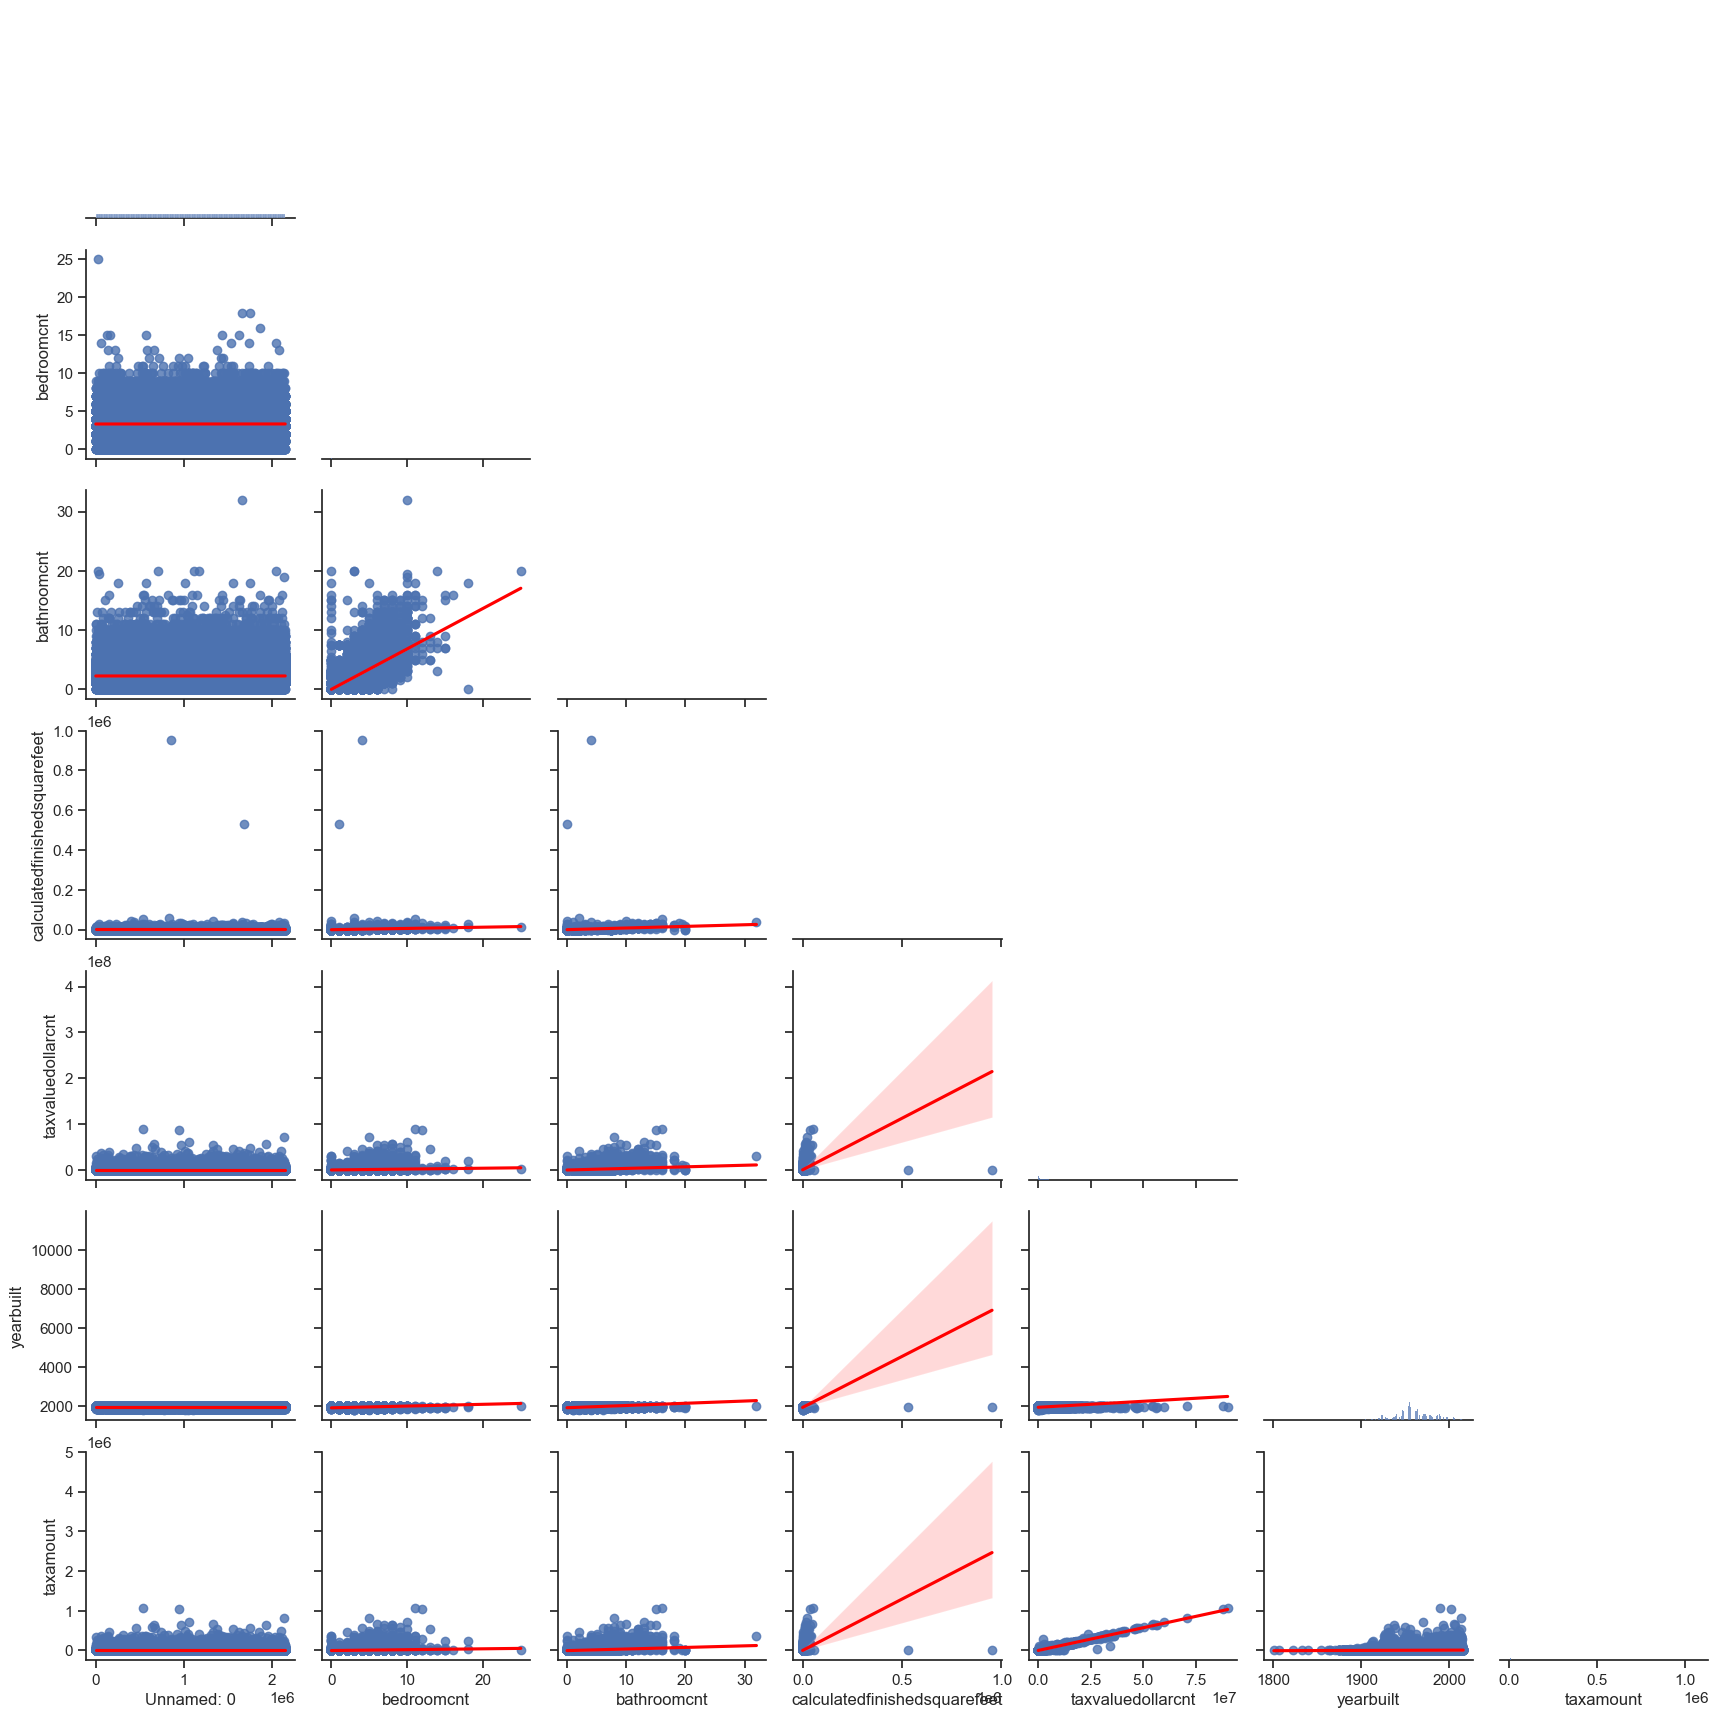

In [10]:
g = sns.pairplot(train, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})

### `function()`
### Plot Variable Pairs + Regression Line

In [4]:
def plot_variable_pairs(df):
    sns.set(style="ticks", color_codes=True)
    plot = sns.pairplot(df, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
    plt.show()

In [ ]:
plot_variable_pairs(train)


### 4. 
### `function()`
### Plot Categorical & Continuous

In [8]:
train.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc
785772,785772,4.0,3.0,2317.0,605000.0,2004,10375.80,06037,Single Family Residential
1680852,1680852,3.0,2.0,1100.0,371756.0,1920,4552.68,06037,Single Family Residential
1862470,1862470,4.0,3.5,3262.0,836321.0,2014,9350.92,06111,Single Family Residential
148761,148761,4.0,3.0,1920.0,568808.0,1955,6453.06,06059,Single Family Residential
1770814,1770814,2.0,1.0,992.0,162283.0,1929,2436.98,06037,Single Family Residential


In [ ]:
continous discrete

In [ ]:
def plot_categorical_and_continuous_vars():

In [10]:
# binned + numerical = categorical
# binary = keyword
# exploring, leave the target, use unscaled

In [11]:
train.columns

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusedesc'],
      dtype='object')

In [40]:
continuous_var = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']
discrete_var = ['fips','yearbuilt']

In [41]:
train[discrete_var]

,fips,yearbuilt
785772,06037,2004
1680852,06037,1920
1862470,06111,2014
148761,06059,1955
1770814,06037,1929
...,...,...
109743,06037,1959
1547574,06059,1948
1804611,06037,1955
37983,06037,1950


In [58]:
train = train.astype({'yearbuilt':'string'})
train = train.astype({'fips':'string'})

In [46]:
train.dtypes

Unnamed: 0                        int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                        string
taxamount                       float64
fips                             object
propertylandusedesc              object
dtype: object

In [47]:
for discrete in discrete_var:
    for continous in continuous_var:
        print(f'sns.boxplot(x={discrete}, y={continous}, data=train)')

sns.boxplot(x=fips, y=bedroomcnt, data=train)
sns.boxplot(x=fips, y=bathroomcnt, data=train)
sns.boxplot(x=fips, y=calculatedfinishedsquarefeet, data=train)
sns.boxplot(x=fips, y=taxvaluedollarcnt, data=train)
sns.boxplot(x=fips, y=taxamount, data=train)
sns.boxplot(x=yearbuilt, y=bedroomcnt, data=train)
sns.boxplot(x=yearbuilt, y=bathroomcnt, data=train)
sns.boxplot(x=yearbuilt, y=calculatedfinishedsquarefeet, data=train)
sns.boxplot(x=yearbuilt, y=taxvaluedollarcnt, data=train)
sns.boxplot(x=yearbuilt, y=taxamount, data=train)


In [50]:
train['yearbuilt'].value_counts

<bound method IndexOpsMixin.value_counts of 785772     2004
1680852    1920
1862470    2014
148761     1955
1770814    1929
           ... 
109743     1959
1547574    1948
1804611    1955
37983      1950
97624      1978
Name: yearbuilt, Length: 1369750, dtype: string>

```python

df['Age Groups'] = pd.qcut(
   df['Age'], 
   [0, 0.25, 0.5, 0.75, 1], 
   labels=['0-25%', '26-49%', '51-75%', '76-100%']
)
```

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369750 entries, 785772 to 97624
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1369750 non-null  int64  
 1   bedroomcnt                    1369750 non-null  float64
 2   bathroomcnt                   1369750 non-null  float64
 3   calculatedfinishedsquarefeet  1369750 non-null  float64
 4   taxvaluedollarcnt             1369750 non-null  float64
 5   yearbuilt                     1369750 non-null  string 
 6   taxamount                     1369750 non-null  float64
 7   fips                          1369750 non-null  object 
 8   propertylandusedesc           1369750 non-null  object 
dtypes: float64(5), int64(1), object(2), string(1)
memory usage: 104.5+ MB


In [98]:
train['yearbuilt']=train['yearbuilt'].astype('int')

In [84]:
print(df_min)
print(df_max)

1801
2016


In [83]:
df_range = df_max - df_min

In [88]:
df_range

215

In [89]:
df_range/20

10.75

In [87]:
df_range/10

21.5

In [123]:
def bin_years(year):
    
    if (year < 1820):
        return '1800 - 1820'
    elif (1820 <= year < 1840):
        return '1820 - 1840'
    elif (1840 <= year < 1860):
        return '1840 - 1860'
    elif (1860 <= year < 1880):
        return '1860 - 1880'
    elif (1880 <= year < 1900):
        return '1880 - 1900'
    elif (1900 <= year < 1920):
        return '1900 - 1920'
    elif (1920 <= year < 1940):
        return '1920 - 1940'
    elif (1940 <= year < 1960):
        return '1940 - 1960'
    elif (1960 <= year < 1980):
        return '1960 - 1980'
    elif (1980 <= year < 2000):
        return '1980 - 2000'
    elif (2000 <= year < 2020):
        return '2000 - 2020'

In [99]:
train.dtypes

Unnamed: 0                        int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                         int64
taxamount                       float64
fips                             string
propertylandusedesc              object
dtype: object

In [85]:
df_min = train['yearbuilt'].astype('int').min()
df_max = train['yearbuilt'].astype('int').max()

In [ ]:
# df['birth_reg'] = df['birth_state'].apply(get_birth_reg)

In [127]:
test=pd.DataFrame(train['yearbuilt'])

In [128]:
test['decades'] = test['yearbuilt'].apply(bin_years)

In [145]:
test['quantiles'] = pd.qcut(test['yearbuilt'], q=20, precision=0)

In [131]:
test['bedroomcnt'] = train['bedroomcnt']

In [129]:
bin_years(2006)

'2000 - 2020'

In [ ]:
pd.qcut(df['ext price'], q=4)

In [143]:
test

,yearbuilt,decades,bedroomcnt,quantiles
785772,2004,2000 - 2020,4.0,"(1992.0, 2016.0]"
1680852,1920,1920 - 1940,3.0,"(1800.0, 1930.0]"
1862470,2014,2000 - 2020,4.0,"(1992.0, 2016.0]"
148761,1955,1940 - 1960,4.0,"(1951.0, 1955.0]"
1770814,1929,1920 - 1940,2.0,"(1800.0, 1930.0]"
...,...,...,...,...
109743,1959,1940 - 1960,3.0,"(1958.0, 1964.0]"
1547574,1948,1940 - 1960,3.0,"(1947.0, 1951.0]"
1804611,1955,1940 - 1960,4.0,"(1951.0, 1955.0]"
37983,1950,1940 - 1960,3.0,"(1947.0, 1951.0]"


<function matplotlib.pyplot.show(close=None, block=None)>

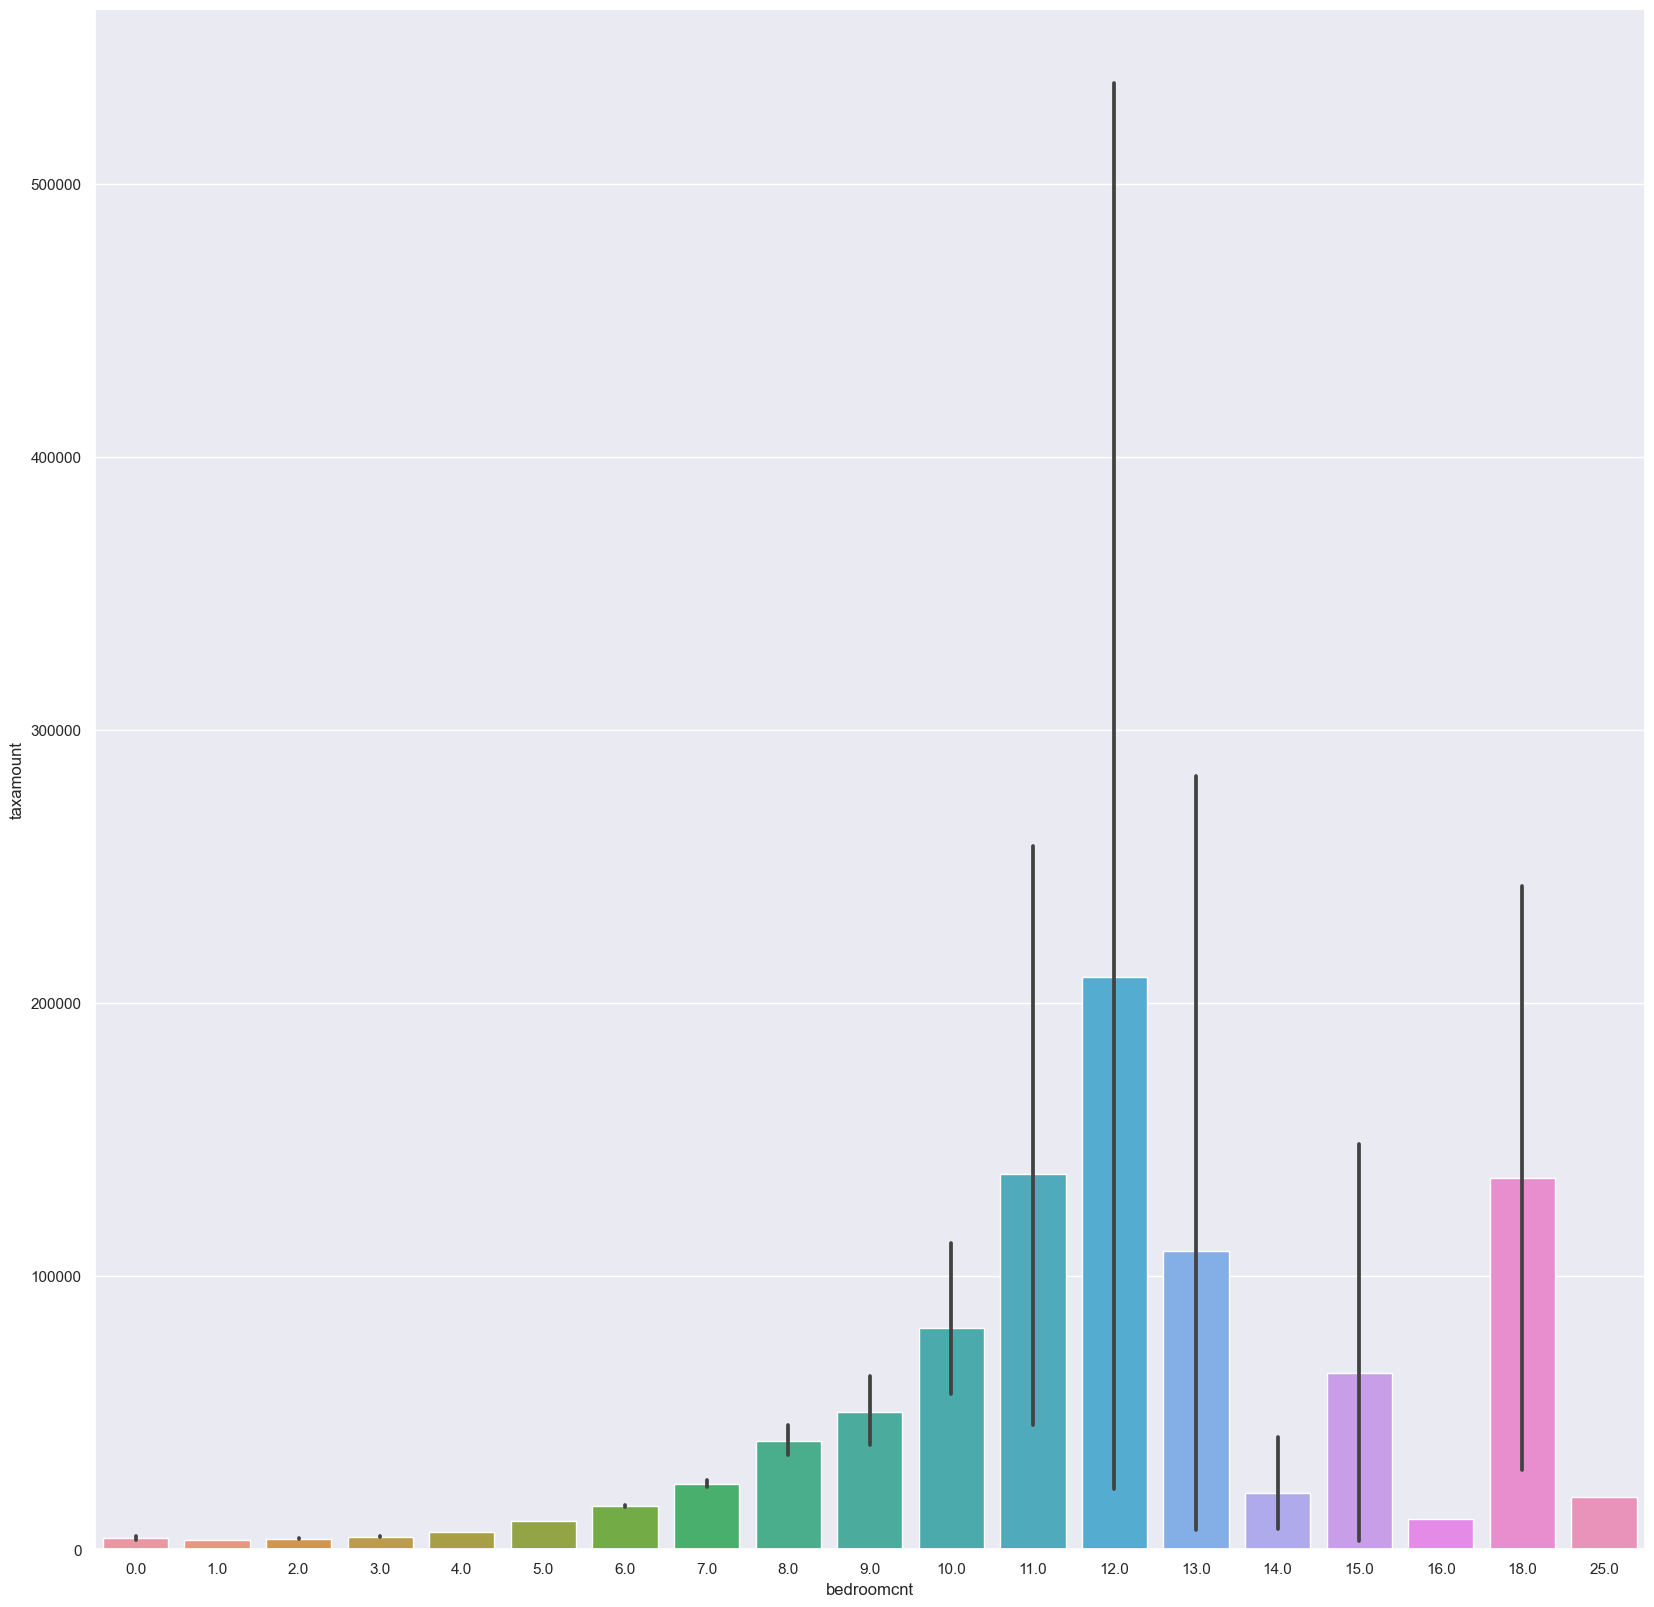

In [146]:
sns.barplot(x='bedroomcnt', y='taxamount', data=train)
plt.show

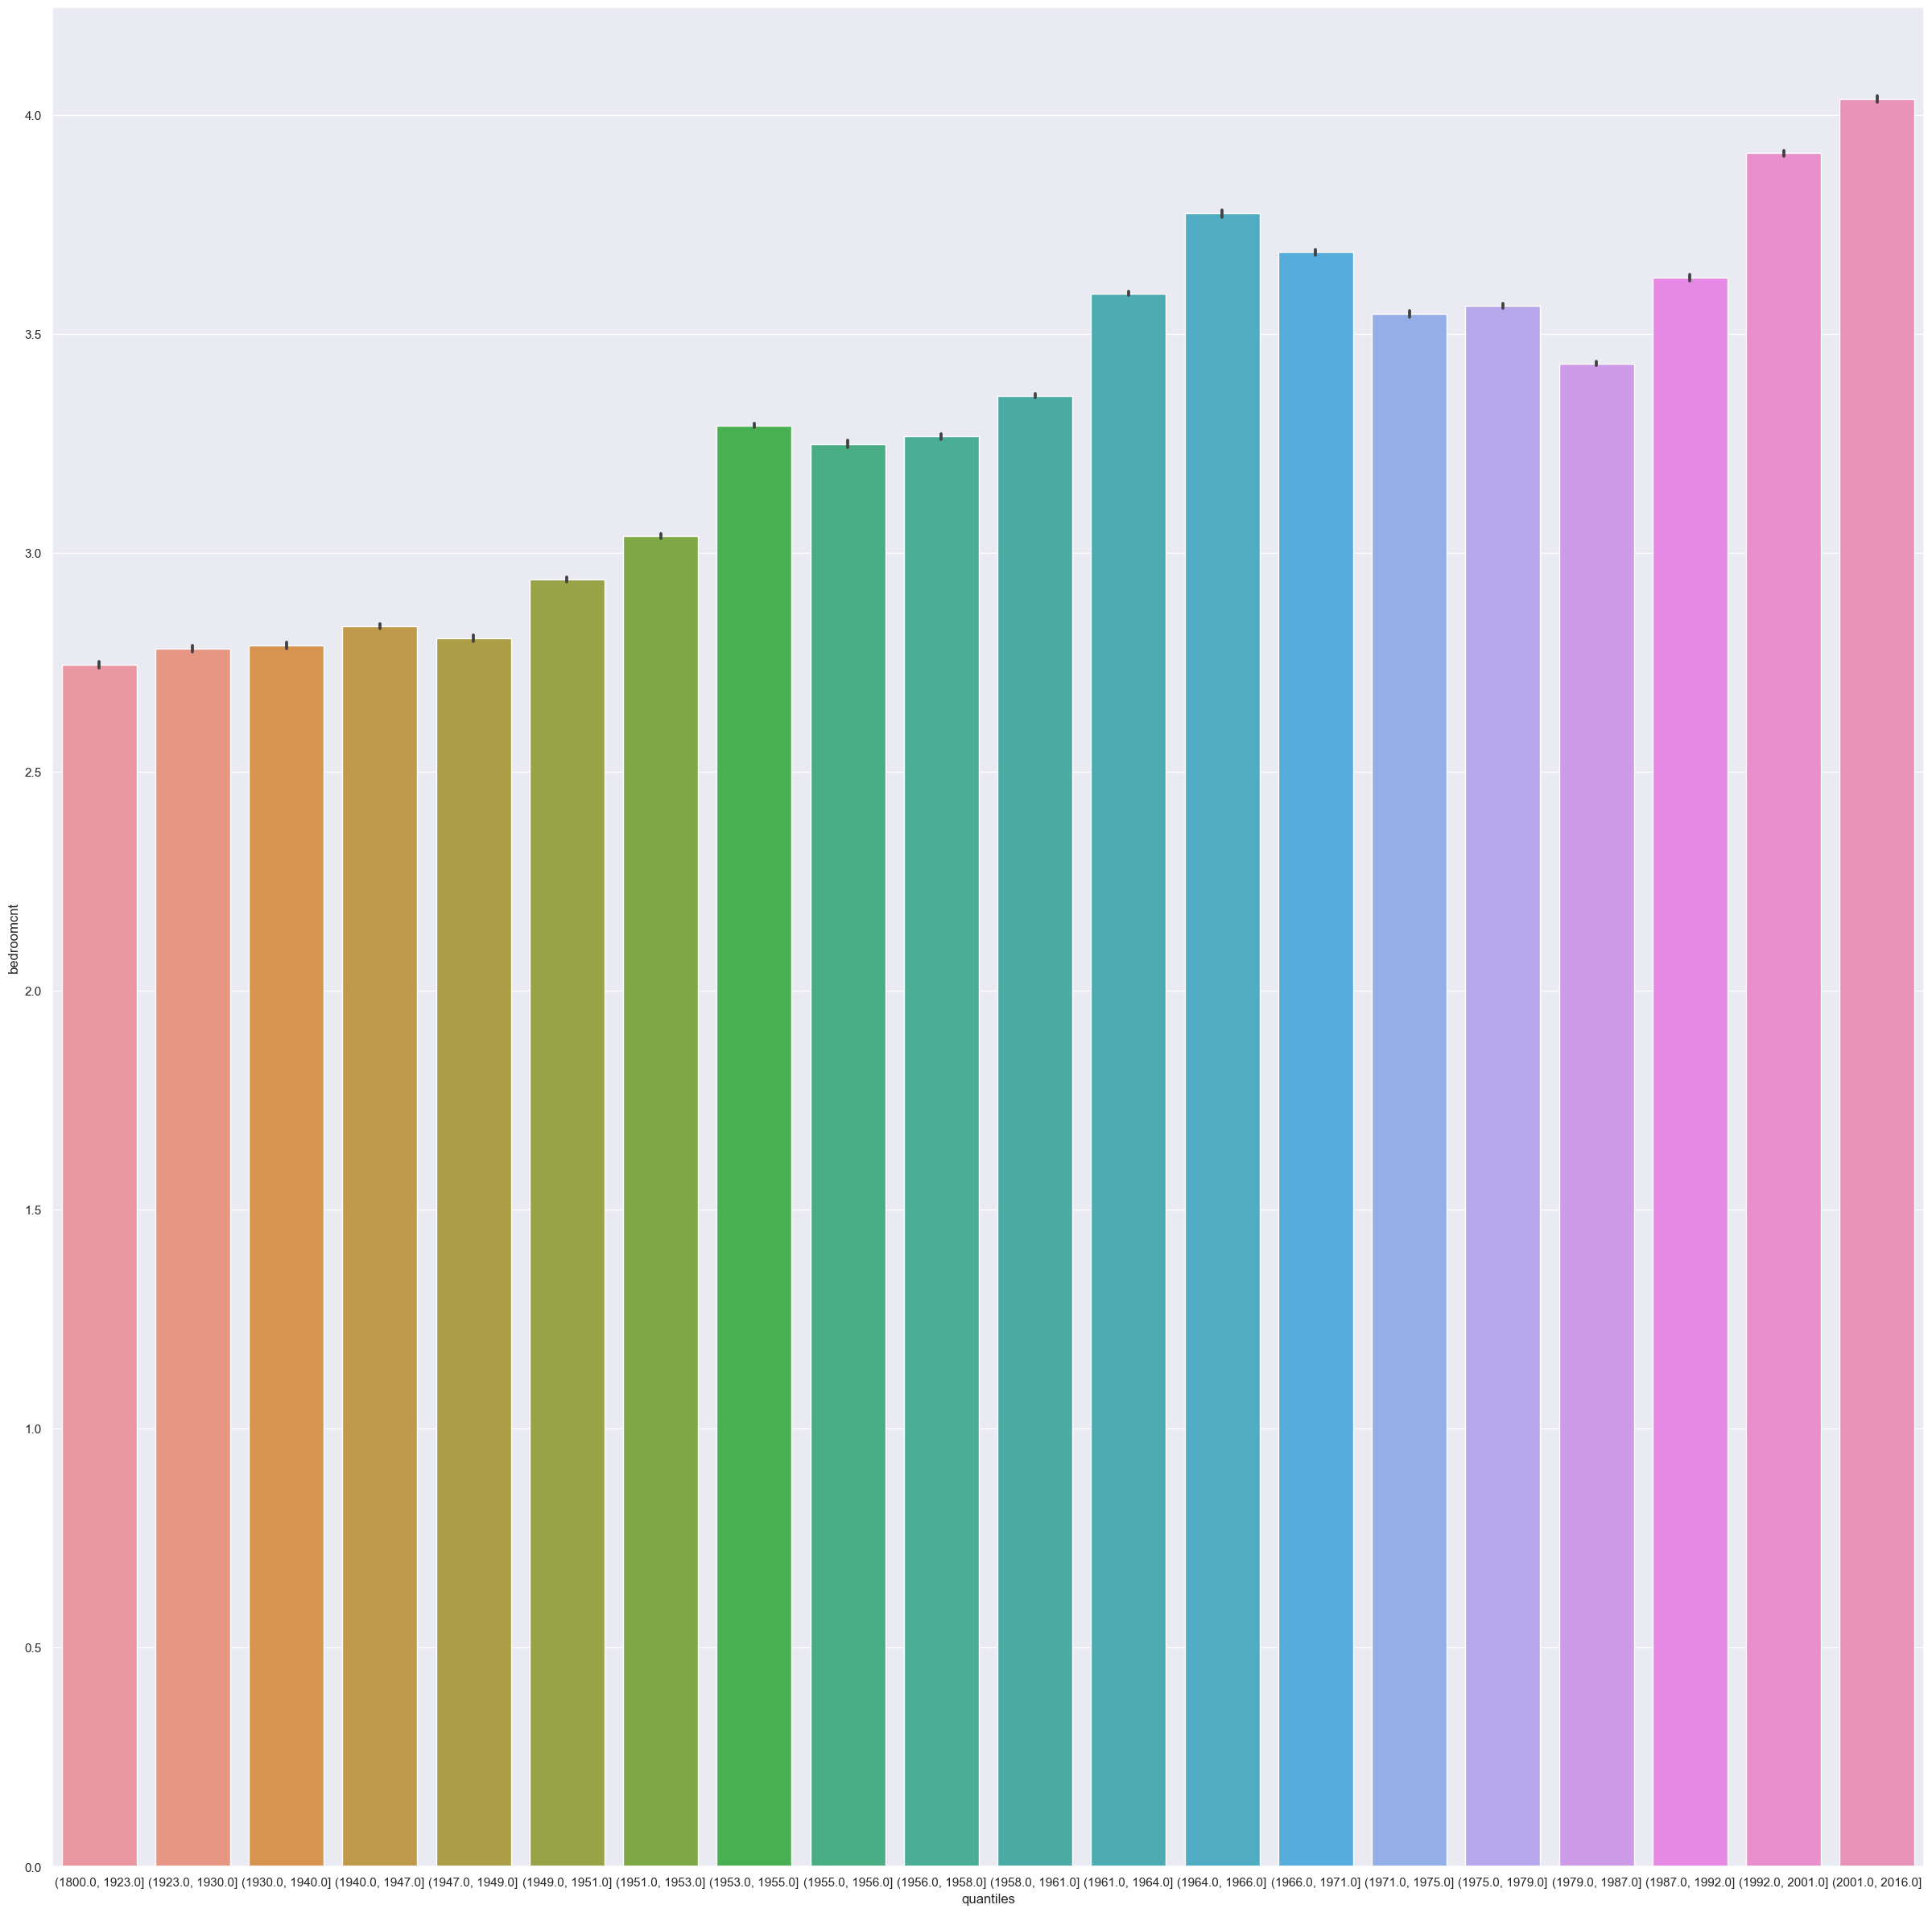

In [149]:
# Test Bar Plot - Year Built - Bins
sns.barplot(x='quantiles', y='bedroomcnt', data=test)
plt.rcParams["figure.figsize"] = (50,50)
plt.show()

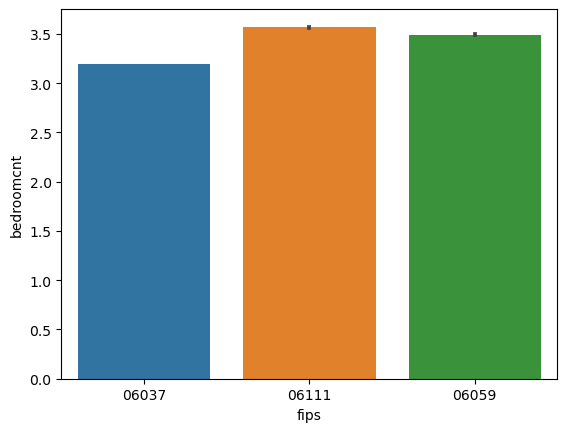

In [62]:
sns.barplot(x='fips', y='bedroomcnt', data=train)
plt.show()

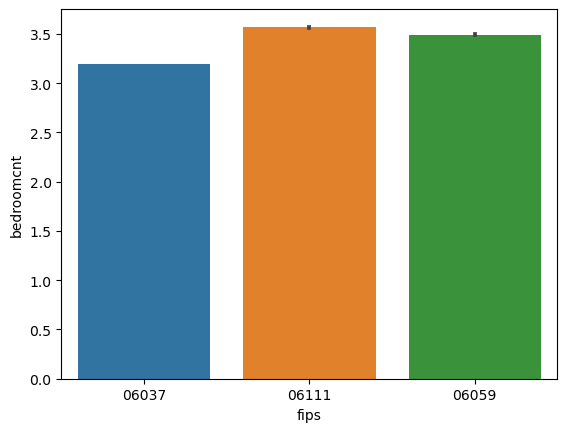

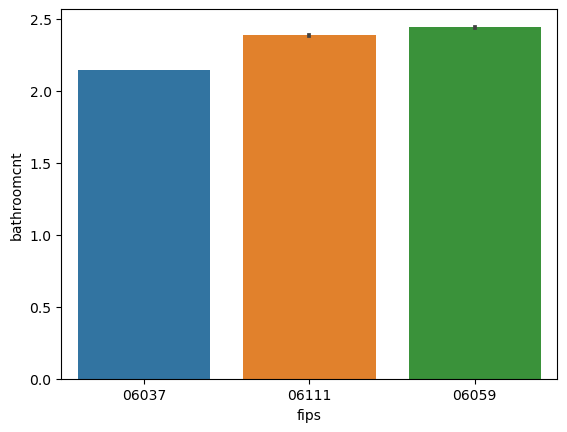

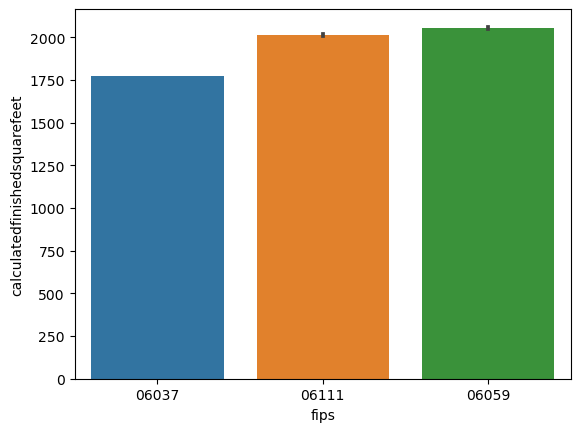

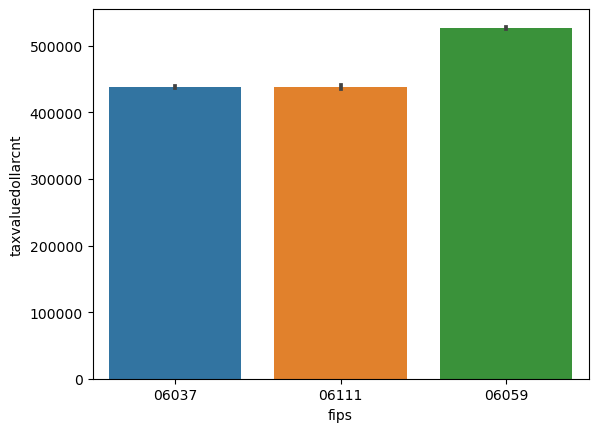

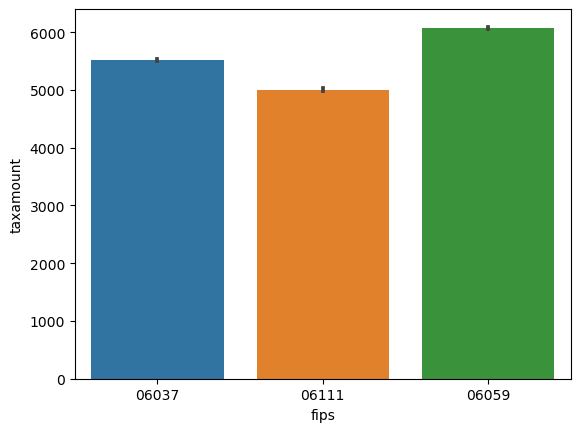

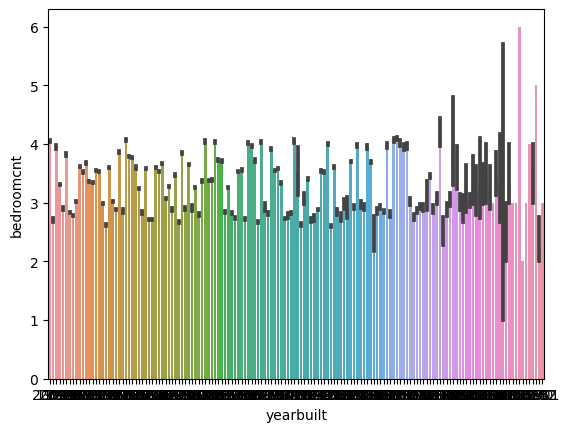

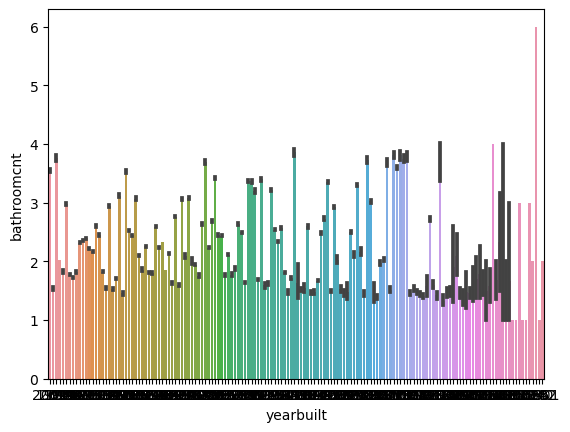

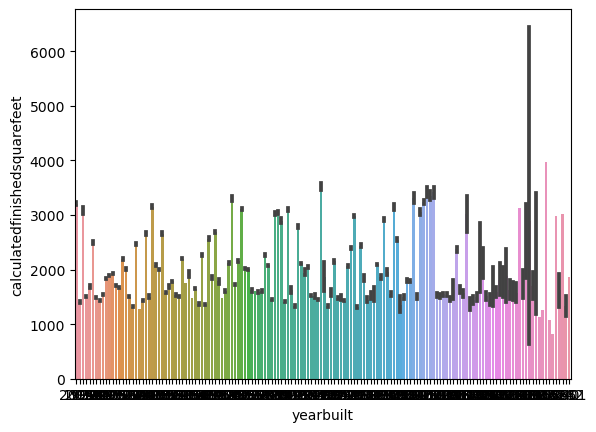

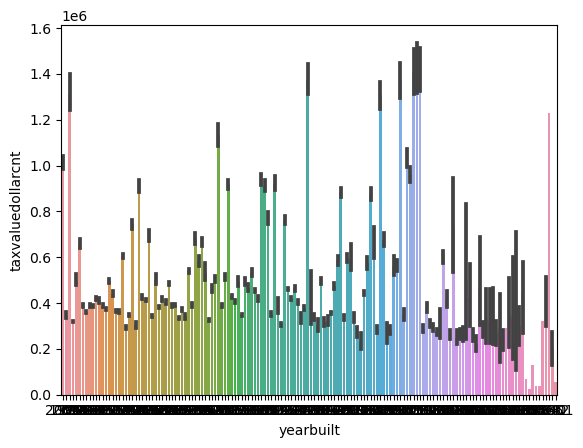

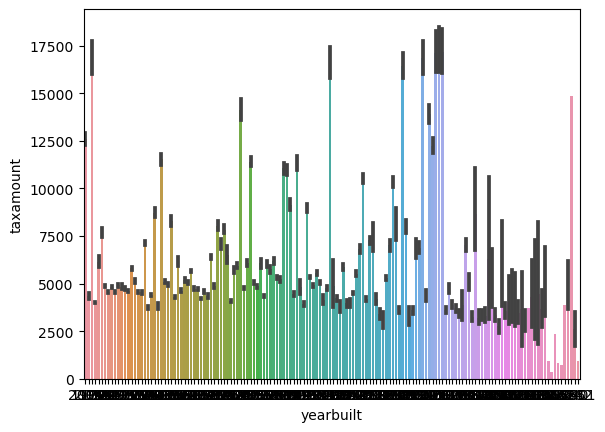

In [59]:
for discrete in discrete_var:
    for continous in continuous_var:
        
        #sns.boxplot(x=discrete, y=continous, data=train)
        #plt.show()
        
        #sns.violinplot(x=discrete, y=continous, data=train)
        #plt.show()
        
        sns.barplot(x=discrete, y=continous, data=train,bins=50)
        plt.show()

In [ ]:
sns.boxplot(x=discrete_var, y=continuous_var, data=train)
sns.violinplot(x=discrete_var, y=continuous_var, data=train)
sns.barplot(x=discrete_var, y=continuous_var, data=train)

In [ ]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='exam1', y='final_grade',
           line_kws={'color':'red'})
plt.show()

In [ ]:
def plot_categorical_and_continuous_vars():

### Save to
### `explore.py`

### What independent variables are correlated with the dependent variable, home value?

### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### Come up with some initial hypotheses based on your goal of predicting property value.

In [ ]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)